<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 4</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

# Bibliotecas y funciones

In [ ]:
# Modulos a instalar
#!pip install pmdarima
# !pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 5.7 MB/s eta 0:00:00


- Cargamos librerias

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm

- Cargamos funciones

A continuacion, definimos la funcion que analiza mediante diferentes pruebas el orden de diferenciacion requerido para que la serie pueda llegar a ser estacionaria. Este es un analisis complementario, junto con los otros realizados. <br>
Las pruebas realizadas son:
<ol>
  <li>Prueba de Dickey-Fuller aumentada</li>
  <li>Prueba de Kwiatkowski-Phillips-Schmidt-Shin</li>
  <li>Prueba de Phillips-Perron</li>
</ol>

In [ ]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [ ]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie 1: Residentes')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Repito grafico: Residentes')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

In [ ]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

- Importamos serie

# Preprocesamiento de base de datos

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/indices-precios-internacionales-productos-basicos-mensual.csv'
serie = pd.read_csv(url, index_col='indice_tiempo', parse_dates=True)
serie = serie.asfreq('MS')
serie_indice = pd.read_csv(url, parse_dates=True)

In [ ]:
maiz_ts=serie.drop(['trigo','arroz','cebada','poroto_soja','harina_soja'], axis=1)

In [ ]:
maiz_ts.head()

,maiz
indice_tiempo,
1980-01-01,105.506813
1980-02-01,114.167831
1980-03-01,109.837318
1980-04-01,108.262604
1980-05-01,109.837318


In [ ]:
maiz_ts.tail()

,maiz
indice_tiempo,
2017-02-01,162.9
2017-03-01,159.0
2017-04-01,156.4
2017-05-01,158.6
2017-06-01,158.0


In [ ]:
# Verificamos si hay nulos, y corroboramos que no los hay
print(maiz_ts.isnull().values.any())

False


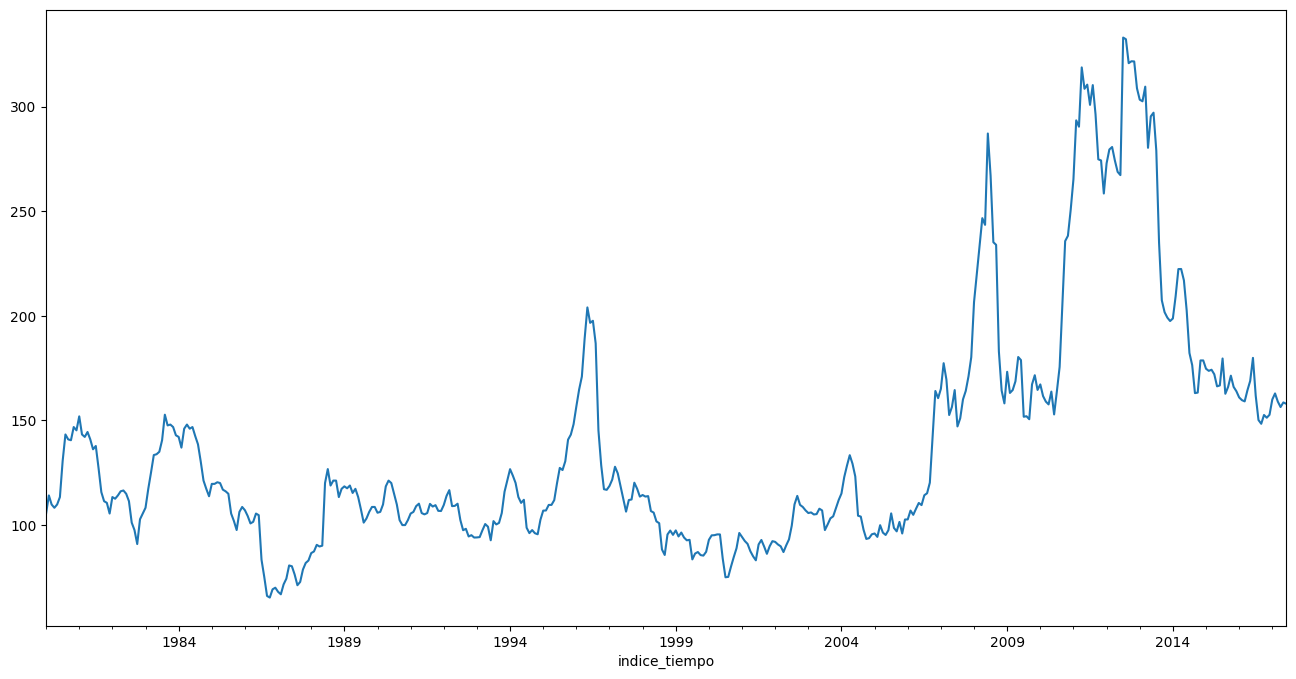

In [ ]:
serie.maiz.plot(figsize=(16,8));

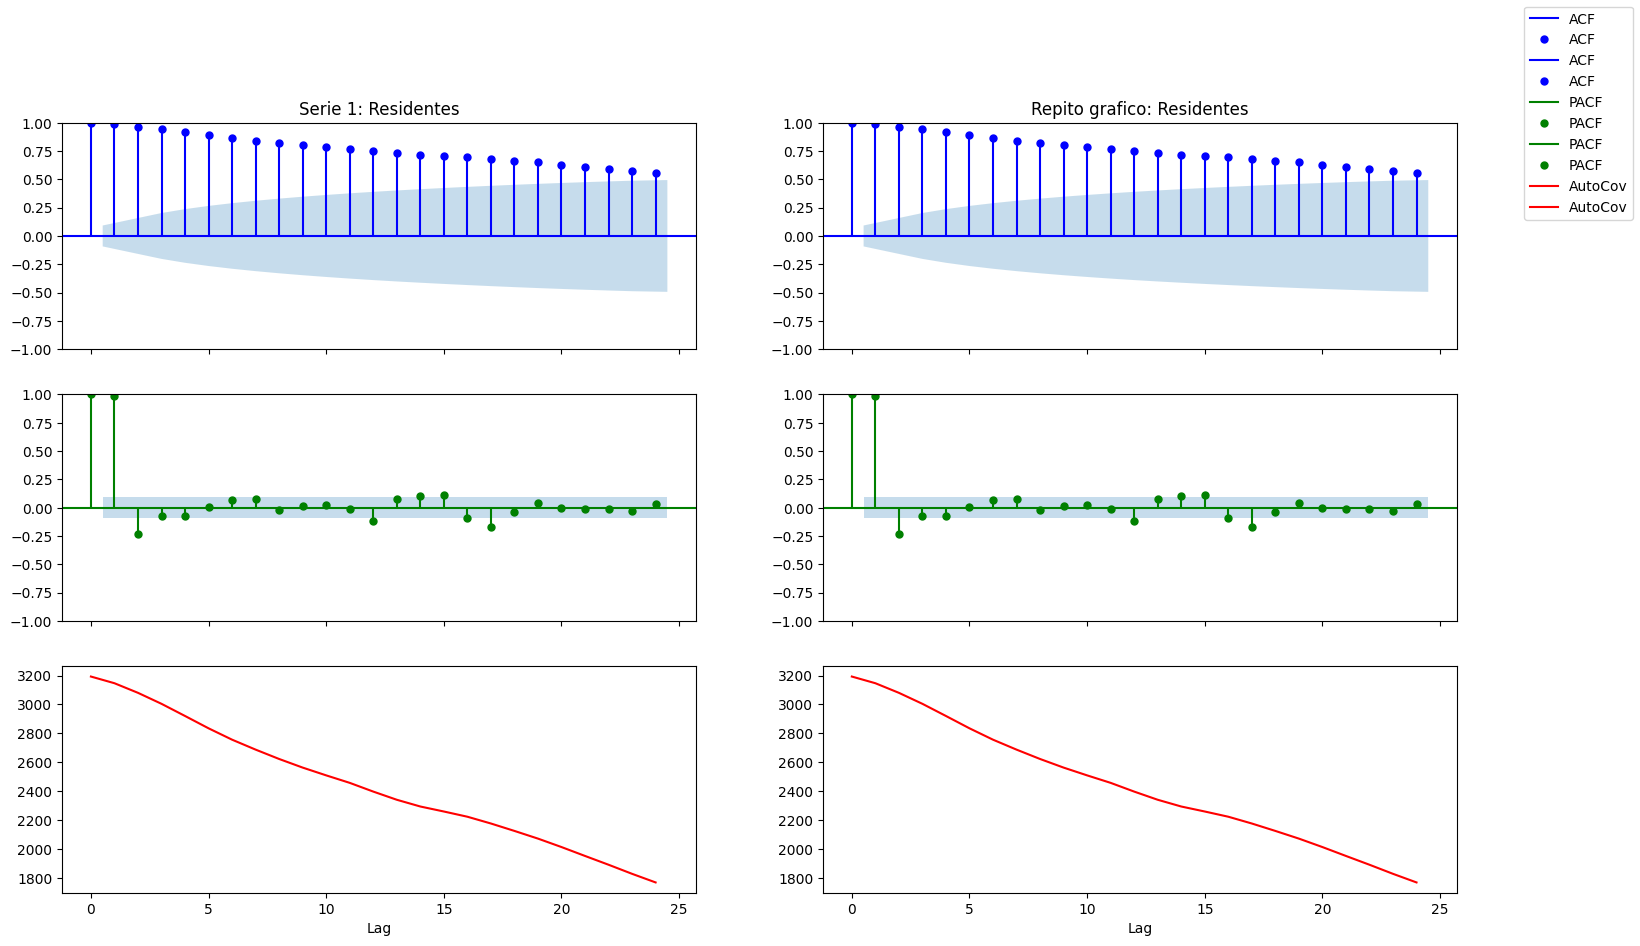

In [ ]:
# Grafica diferentes funciones de la serie
autocov_autocorr(maiz_ts, maiz_ts ,24)

# Transformaciones de la serie

- Alternativa 1 <br>
  Diferenciacion por un periodo de la serie

In [ ]:
# Opcion 1
maiz_ts_diff_1_opcion_1=maiz_ts.copy()
maiz_ts_diff_1_opcion_1=maiz_ts_diff_1_opcion_1.diff(axis = 0, periods = 1)
maiz_ts_diff_1_opcion_1.drop(['1980-01-01'], inplace=True)

In [ ]:
# Opcion 2
maiz_ts_diff_1_opcion_2=maiz_ts.copy()
maiz_ts_diff_1_opcion_2 = maiz_ts_diff_1_opcion_2 - maiz_ts_diff_1_opcion_2.shift(1)
maiz_ts_diff_1_opcion_2= maiz_ts_diff_1_opcion_2.dropna()

- Alternativa 2 <br>
Diferenciacion estacional (12 periodos) de la serie

In [ ]:
maiz_ts_diff_12=maiz_ts.copy()
maiz_ts_diff_12 = maiz_ts_diff_12 - maiz_ts_diff_12.shift(12)
maiz_ts_diff_12= maiz_ts_diff_12.dropna()

- Alternativa 3 <br>
  Transformacion de Box Cox

In [ ]:
from scipy import stats
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Obtener valores de nuestra columna
maiz_ts_BoxCox=maiz_ts.copy()
transformacion_Box_Cox = np.asarray(maiz_ts_BoxCox['maiz'].values)

In [ ]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(transformacion_Box_Cox)

<ipython-input-20-a28fd633a391>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformacion_Box_Cox, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-20-a28fd633a391>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility

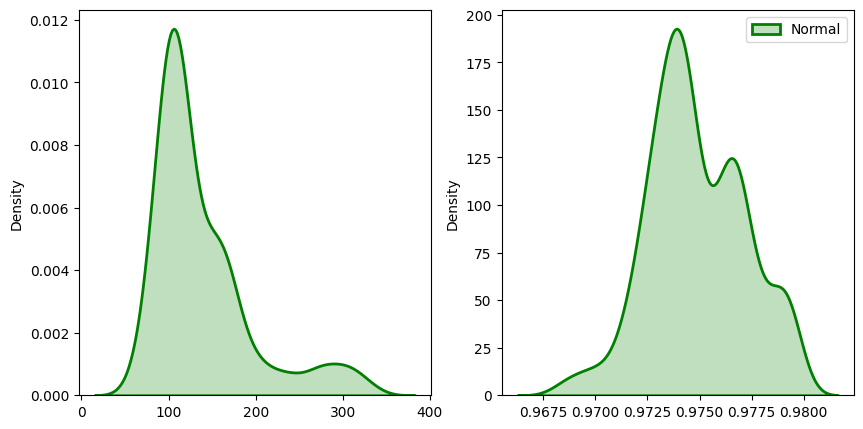

In [ ]:
# creando ejes para dibujar
fig, ax = plt.subplots(1, 2)

# grafico de serie original (non-normal) y fitted data (normal)
sns.distplot(transformacion_Box_Cox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# agregando leyendas a las subtramas
plt.legend(loc = "upper right")

# reescalando las subtramas
fig.set_figheight(5)
fig.set_figwidth(10)

In [ ]:
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: -1.0180744061829288


In [ ]:
maiz_ts_BoxCox=pd.DataFrame(fitted_data, columns=['maiz'])

- Alternativa 4 <br>

Transformacion logaritmica

In [ ]:
maiz_ts_log=maiz_ts.copy()
maiz_ts_log = np.log(maiz_ts_log)

- Alternativa 5 <br>

Transformacion Raiz cuadrada

In [ ]:
maiz_ts_Rcuadrado=maiz_ts.copy()
maiz_ts_Rcuadrado=np.sqrt(maiz_ts_Rcuadrado)

# Analisis de estacionariedad de la serie

Componentes deterministicos - Test de Raíces Unitarias - Dickey Fuller

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

- Serie original

In [ ]:
print_test_afd(maiz_ts)

Estadistico ADF: -2.150018
p-valor: 0.224883
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570


In [ ]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(maiz_ts, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-0.700627302548721,
 0.41234587068932294,
 16,
 433,
 {'1%': -2.5709228555275243,
  '5%': -1.9416378864437647,
  '10%': -1.6162207681657739},
 3130.458609577689)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(maiz_ts, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-2.1500183335277887,
 0.2248830733867238,
 16,
 433,
 {'1%': -3.445542818501549,
  '5%': -2.868238133603207,
  '10%': -2.5703378690483176},
 3128.1145793319424)

In [ ]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(maiz_ts, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-2.932371299544158,
 0.15197988628737646,
 16,
 433,
 {'1%': -3.9798311295958153,
  '5%': -3.420678245656216,
  '10%': -3.133042572822471},
 3126.1216090615862)

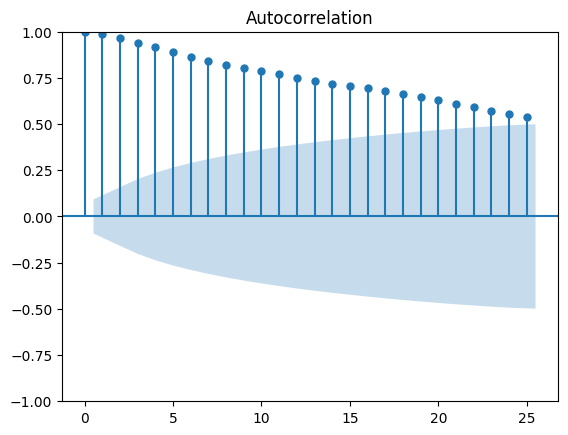

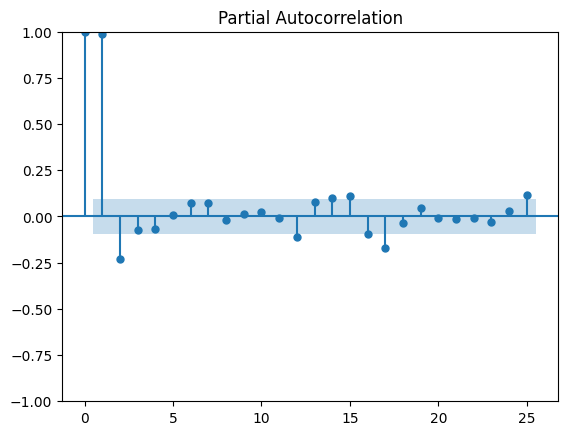

In [ ]:
plot_acf(maiz_ts,lags=25);
plot_pacf(maiz_ts,lags=25);

In [ ]:
estacionario(maiz_ts)

Estimado de número de diferencias con ADF test
1
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
1
Se debe realizar diferenciación (should_diff) ADF Test
(0.23645445183954383, True)


- Serie diferenciada

In [ ]:
print_test_afd(maiz_ts_diff_1_opcion_1)

Estadistico ADF: -4.976640
p-valor: 0.000025
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570


In [ ]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(maiz_ts_diff_1_opcion_1, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-4.9822245006963355,
 1.1451336840197694e-06,
 15,
 433,
 {'1%': -2.5709228555275243,
  '5%': -1.9416378864437647,
  '10%': -1.6162207681657739},
 3122.0854272859406)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(maiz_ts_diff_1_opcion_1, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.976639635671169,
 2.4681049519257736e-05,
 15,
 433,
 {'1%': -3.445542818501549,
  '5%': -2.868238133603207,
  '10%': -2.5703378690483176},
 3124.066306519608)

In [ ]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(maiz_ts_diff_1_opcion_1, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.974026169514543,
 0.0002293639191854352,
 15,
 433,
 {'1%': -3.9798311295958153,
  '5%': -3.420678245656216,
  '10%': -3.133042572822471},
 3126.057083546732)

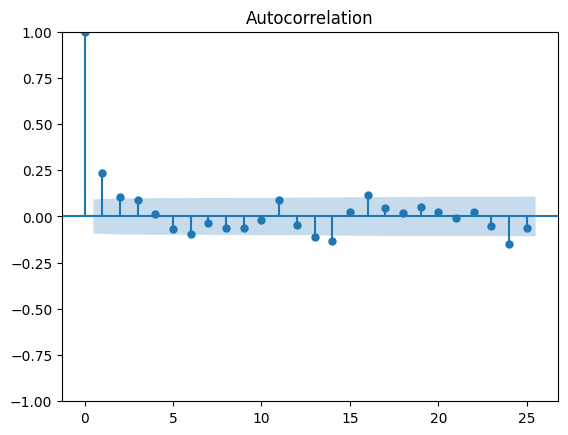

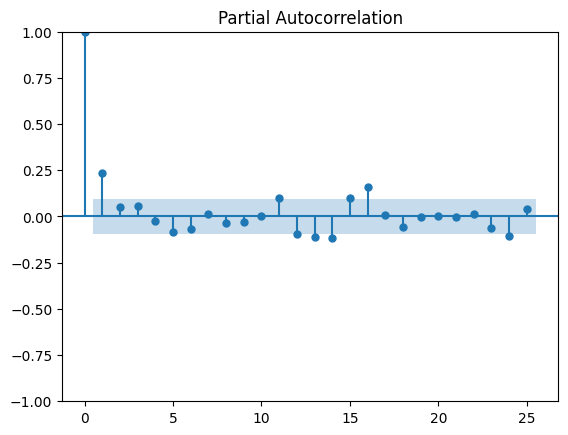

In [ ]:
plot_acf(maiz_ts_diff_1_opcion_1,lags=25);
plot_pacf(maiz_ts_diff_1_opcion_1,lags=25);

In [ ]:
estacionario(maiz_ts_diff_1_opcion_1)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
0
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


- Otras pruebas de hipótesis para poner a prueba la conjetura de Raíz
Unitaria.

Phillips-Perron

In [ ]:
from arch.unitroot import PhillipsPerron

In [ ]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
Phillips_Perron(maiz_ts)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -0.5795402006101509
p-valor: 0.4631726458877527
numero de lags: 18
Valor Critico:
   1% : -2.570737501004459
   5% : -1.9416145647145824
   10% : -1.6162416452796478
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 1
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -2.145448184348537
p-valor: 0.22663647403889842
numero de lags: 18
Valor Critico:
   1% : -3.4449982835447894
   5% : -2.8679986379826814
   10% : -2.5702102140862397
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 1
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -2.5582072543803918
p-valor: 0.29949701152484276
numero de lags: 18
Valor Critico:
   1% : -3.979075299508393
   5% : -3.420313496191384
   

In [ ]:
Phillips_Perron(maiz_ts_diff_1_opcion_1)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -16.4014016153128
p-valor: 4.346426546002815e-28
numero de lags: 18
Valor Critico:
   1% : -2.5707486963887116
   5% : -1.941615972306499
   10% : -1.6162403831708814
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -16.381482133730152
p-valor: 2.7487862463656193e-29
numero de lags: 18
Valor Critico:
   1% : -3.4450311708077743
   5% : -2.8680131035505023
   10% : -2.570217924306441
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -16.360987434761906
p-valor: 0.0
numero de lags: 18
Valor Critico:
   1% : -3.9791209459359305
   5% : -3.420335526154187
   10% : -3.13284123

KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
kpss_test(maiz_ts)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 1.4818856945725614
p-valor: 0.01
numero de lags: 12
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.34871417692497414
p-valor: 0.01
numero de lags: 12
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



<ipython-input-48-4f94f3bfddd1>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
<ipython-input-48-4f94f3bfddd1>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [ ]:
kpss_test(maiz_ts_diff_1_opcion_1)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.03945291995902327
p-valor: 0.1
numero de lags: 7
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.04078868786562611
p-valor: 0.1
numero de lags: 7
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



<ipython-input-48-4f94f3bfddd1>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
<ipython-input-48-4f94f3bfddd1>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
